In [1]:
import os
import sys

home=os.path.expanduser("~")
os.environ["SPARK_HOME"]=os.path.join(home, 'spark-2.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [2]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).getOrCreate()

# OLS

In [3]:
import numpy as np
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

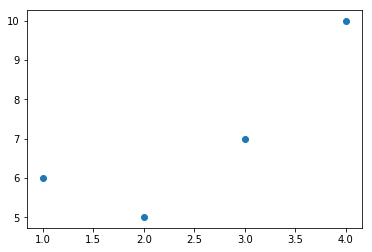

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)

In [14]:
yhat=x*1.4+3.5
print(yhat)

print(yhat-y)

print np.sum(np.power(yhat-y,2))

[4.9 6.3 7.7 9.1]
[-1.1  1.3  0.7 -0.9]
4.199999999999998


# python에서 편미분하기

In [16]:
# differentiation
import sympy as sp
b0,b1=sp.symbols('b0 b1')

f=210 + 4*b0**2 + 30*b1**2 + 20*b0*b1 - 56*b0 - 154*b1
fdiff_b0=sp.diff(f,b0)
fdiff_b1=sp.diff(f,b1)
print("fdiff with b0: ",fdiff_b0,"fdiff with b1: ",fdiff_b1)

exp=sp.solve([fdiff_b0, fdiff_b1],[b0,b1])
print("exp={0}".format(exp))

('fdiff with b0: ', 8*b0 + 20*b1 - 56, 'fdiff with b1: ', 20*b0 + 60*b1 - 154)
exp={b0: 7/2, b1: 7/5}


# R2

In [17]:
import numpy as np
x=np.arange(0,9)
y=np.array([19, 20, 20.5, 21.5, 22, 23, 23, 25.5, 24])

A=np.array([x,np.ones(9)])
print A

[[0. 1. 2. 3. 4. 5. 6. 7. 8.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]


# lstsq를 이용하여 회귀식 구하기

In [24]:
w0,w1=np.linalg.lstsq(A.T,y)[0]
print w0,w1

0.7166666666666672 19.188888888888897


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


In [25]:
yhat=w0*x+w1
print yhat

[19.18888889 19.90555556 20.62222222 21.33888889 22.05555556 22.77222222
 23.48888889 24.20555556 24.92222222]


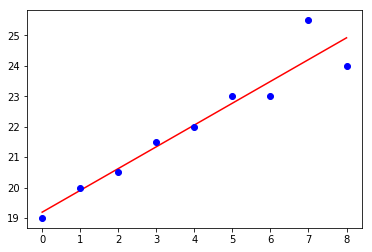

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x,yhat,'r-',x,y,'bo')
plt.show()

# R^2 adjusted=1−(1−R^2)(n−1)/n−k−1 
n은 데이터 개수
k는 독립변수 개수

In [31]:
SSR = sum((y-yhat)**2)
TSS = sum((y-np.mean(y))**2)
r_squared = 1 - (float(SSR))/TSS
print r_squared

0.9138385502471171


In [32]:
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-A.shape[0]-1)   # 0.9015 without -1
print adjusted_r_squared

0.8851180669961561


In [49]:
import statsmodels.api as sm
result = sm.ols(yhat, A.T).fit()
print result.summary()
print result.rsquared, result.rsquared_adj

AttributeError: 'module' object has no attribute 'ols'

# Matrix Inverse Method 회귀모델

In [51]:
import numpy as np

y=[8,9]
x=[[2,-4],[3,6]]
print "x: ", x, "y: ", y

xI = np.linalg.inv(x) 
print "x inv: \n", xI

x:  [[2, -4], [3, 6]] y:  [8, 9]
x inv: 
[[ 0.25        0.16666667]
 [-0.125       0.08333333]]


In [53]:
print "identity matrix 'x * xT': \n", np.dot(x,xI)
print '\n'
print np.eye(2)

identity matrix 'x * xT': 
[[1. 0.]
 [0. 1.]]


[[1. 0.]
 [0. 1.]]


# 베타 β=x^−1×y

In [55]:
v=np.array([[2,3],[4,5]])
vI=np.linalg.inv(v)
print "v=\n{0}\nv.I=\n{1}".format(v,vI)

v=
[[2 3]
 [4 5]]
v.I=
[[-2.5  1.5]
 [ 2.  -1. ]]


In [56]:
import numpy as np

x=np.array([[2,-4],[3,6]])
y=np.array([8,9])

xI=np.linalg.inv(x)

w1,w2=np.dot(xI,y)

print 2*w1+(-4)*w2
print 3*w1+6*w2

8.0
9.0


# 회귀모델 문제

In [73]:
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])

In [74]:
x=np.array([x,np.ones(len(x))])
x=x.T
print(x)

[[1. 1.]
 [2. 1.]
 [3. 1.]
 [4. 1.]]


In [75]:
np.dot(x,x.T)

array([[ 2.,  3.,  4.,  5.],
       [ 3.,  5.,  7.,  9.],
       [ 4.,  7., 10., 13.],
       [ 5.,  9., 13., 17.]])

In [76]:
xTx=np.dot(x.T,x)
print("xTx=",xTx)

xTxI=np.linalg.inv(xTx)
print("xTxI=",xTxI)

xTyT=np.dot(x.T,y)
print("xTyT=",xTyT)

print("weights=",np.dot(xTxI,xTyT))

# 한줄로 줄이면
print np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))

('xTx=', array([[30., 10.],
       [10.,  4.]]))
('xTxI=', array([[ 0.2, -0.5],
       [-0.5,  1.5]]))
('xTyT=', array([77., 28.]))
('weights=', array([1.4, 3.5]))
[1.4 3.5]


In [77]:
np.warnings.filterwarnings('ignore')
print("numpy lstsq: ",np.linalg.lstsq(x,y))

('numpy lstsq: ', (array([1.4, 3.5]), array([4.2]), 2, array([5.77937881, 0.77380911])))


In [78]:
w1,w0=np.linalg.lstsq(x,y)[0]
print("w1=",w1,"\nw0=",w0)

('w1=', 1.4000000000000006, '\nw0=', 3.499999999999998)


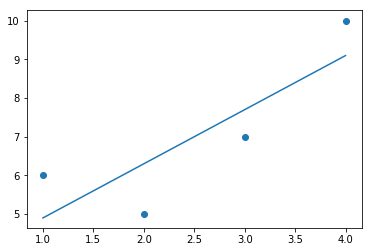

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# compute yhat from the model values of b0 and b1
x=np.array([1,2,3,4])
y=np.array([6,5,7,10])
_x=np.array([x,np.ones(len(x))])
_x=_x.T
b1,b0=np.linalg.lstsq(_x,y)[0]
yhat=b0+b1*x
fig=plt.figure()
ax=fig.add_subplot(111)
ax.scatter(x,y)
ax.plot(x,yhat)